##  -:What is Feature transformation and scaling:-

Feature Transformation is simply a function that transformas features from one representation to another. 

Feature Scalling is a techniques of converting all the values of a feature in a same range.


## -:Normalization vs Standardization:-
Normalization usually means to scale a variable to have a values between 0 and 1, while standardization transforms data to have a mean of zero and a standard deviation of 1. 

## -:Why Feature transformation is necessary:-


Sometimes we have datasets in which different columns have different units - like one column can be in km,  while another can be in meters or centimers. or in a same like scenario we have age column one side which ranges from 0 to 1000 and at the other hand we have salary column that has all the values greate than 10,000.   then in such senerio the difference between these values becomes very large Due to this difference  **the column having larger values will influence the output more.** thus we need to perform feature scaling and transformation to make all the values lie in the same range.

## Different Feature Scaling and Transformation Techniques

1. Min Max Scaler
2. Strandard Scaler
3. MaxAbsScaler
4. Robust Scaler
5. Quantile Transformer Scaler
6. Log Transformation
7. Power Transformer Scaler
8. Unit Vector Scaler/Normalizer

### Let's start by creating a simpler dataframe using pandas

In [1]:
### TO REMOVE UNECESSARY WARNINGS #####
import warnings
warnings.filterwarnings('ignore')



import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

df = pd.DataFrame({
    'salary':[18000,20000,10000,2600,23000],
    'age':[23,24,20,18,28],
    'department':['HR','Marketing','Development','Managment','Legal']
})
df

,salary,age,department
0,18000,23,HR
1,20000,24,Marketing
2,10000,20,Development
3,2600,18,Managment
4,23000,28,Legal


Now, Let's Create a Copy of the dataframe contains only interger columns

In [2]:
df2 = df.copy()
features = df2[['salary','age']]
features

,salary,age
0,18000,23
1,20000,24
2,10000,20
3,2600,18
4,23000,28


## 1️⃣ MinMax Scaler

* It Scales Down all the value between 0 to 1.
* Formula:-     **x_scaled = (x – x_min)/(x_max – x_min)**

In [3]:
### Defining Scaler ###
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#### MinMax Scaling ###
col_names = ['salary', 'age']
features[col_names] = scaler.fit_transform(features.values)
features

,salary,age
0,0.754902,0.5
1,0.852941,0.6
2,0.362745,0.2
3,0.000000,0.0
4,1.000000,1.0


* Above We Can See That How All the values are being scaled from 0 to 1
* Minimum Value(2600) in salary was given : 0
* Max Value(23000) in salary was given : 1
* In Age Min(18) is 0 and Max(28) is given 1

* We can also change the range of values using **feature_range** .

In [4]:
### Defining Scaler ###
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(2,4)) ##Custom Scaling Range

#### MinMax Scaling ###
col_names = ['salary', 'age']
features[col_names] = scaler.fit_transform(features.values)

features

,salary,age
0,3.509804,3.0
1,3.705882,3.2
2,2.725490,2.4
3,2.000000,2.0
4,4.000000,4.0


### 🔰Note: Min Max Scaler Let You Set the range in which you want the variables to be.

## 2️⃣ Standard Scaler

Strandard Scaler Scales the values such that mean is 0 and standard deviation is 1(variance)

* Formula:-   **x_scaled = x – mean/std_dev**


* **Strandard Scaler assumes that the distribution of the variable is normal. Thus in case the variable is not normally distributed,**
1. either, choose a different scaler
2. or first, convert the variables to a normal distribution and then apply scaler


In [5]:
features = df2[['salary','age']]

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# features = scaler.fit_transform(features.values)
# features  ## It will return a 2d array 

features[col_names] = scaler.fit_transform(features.values)
features  ## It will return a dataframe



,salary,age
0,0.441179,0.116248
1,0.710191,0.406867
2,-0.634868,-0.755610
3,-1.630211,-1.336848
4,1.113708,1.569343


In [7]:
features.describe()

,salary,age
count,5.000000e+00,5.000000e+00
mean,4.440892e-17,-3.996803e-16
std,1.118034e+00,1.118034e+00
min,-1.630211e+00,-1.336848e+00
25%,-6.348675e-01,-7.556097e-01
50%,4.411791e-01,1.162476e-01
75%,7.101908e-01,4.068667e-01
max,1.113708e+00,1.569343e+00


## 3️⃣ MaxAbsScaler

MaxAbsScaler takes the absolute maximum value of each column and divides each values in the column by the maximum value of that column.

* First it takes the absolute value of each value in the column
* Then, it takes the maximum value of those.
* Then, Divides the max value with each val of the column

In [8]:
features = df2[['salary','age']]
features['balance'] = [100.0, 25245.567, 134.567, 4567.2345,2345.345]


In [9]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
col_names = ['salary','age','balance']
features[col_names] = scaler.fit_transform(features.values)
features.balance

0    0.003961
1    1.000000
2    0.005330
3    0.180912
4    0.092901
Name: balance, dtype: float64

Let's check the result of MaxAbsScaler

In [10]:
values = [100.0, 25245.567, 134.567, 4567.2345,2345.345]
abs_values = [abs(ele) for ele in values]
max_val = max(abs_values)
val = [ele/max_val for ele in abs_values]
val

[0.003961091466077985,
 1.0,
 0.005330321953157162,
 0.18091233601526951,
 0.09290126064508672]

Above We Have seen that MaxAbsScaler Works Fine and it has given us the same result what we are expecting to get👍👍

###### Till Now We have Seen three Scalers but all of them use mean, max, or min values of the column to scale the data. These values are sensitive to outliers and if there are many outliers in the dataset then these values can be influenced by outliers easily. A robust Scaler is a kind of scaler that is not sensitive to outliers.

## 4️⃣ Robust Scaler

One of the key feature and advantage of robust scaler is that it is not sensitive to outliers.

* It uses IQR(Inter Quartile Range) to scales the data.

1. It removes the median from the data.
2. and, Scales the data using IQR

**Formula:**

IQR = Q3-Q1

X_scaled = (X-Q1)/(Q3-Q1)


In [11]:
features = df2[['salary','age']]

In [12]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

col = ['salary','age']
features[col] = scaler.fit_transform(features.values)
features

,salary,age
0,0.00,0.00
1,0.20,0.25
2,-0.80,-0.75
3,-1.54,-1.25
4,0.50,1.25


## 5️⃣ Quantile Transformer Scaler

* This Technique is like a magic bond. It converts the distribution of data into normal distribution and scales it accordingly. since it makes the variables normally distributed it also deals with the outliers.

```
✔ Outlier Removal
✔ Scalling Data
✔ Conversion into normal distribution
```


**Process**

1. first it computes the cumulative distribution function of the variables

2. then it uses this cdf to map the values to a normal distribution

3. and finally it, Maps the obtained values to the desired output distribution using the associated quantile function



In [13]:
features = df2[['salary','age']]

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

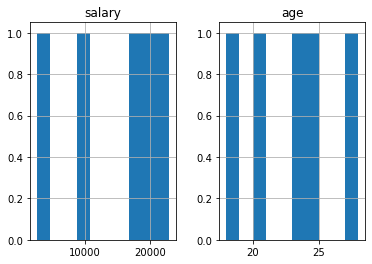

In [14]:
features.hist()

In [15]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()

col = ['salary','age']

features[col] = scaler.fit_transform(features.values)
features

,salary,age
0,0.50,0.50
1,0.75,0.75
2,0.25,0.25
3,0.00,0.00
4,1.00,1.00


array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

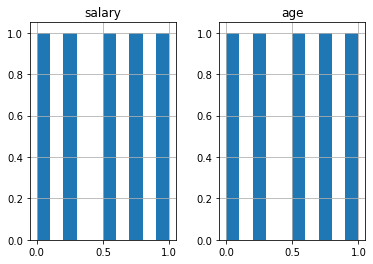

In [16]:
features.hist()

Here we can see that scaler has computed the distribution to normal kind of distribution

## 6️⃣ Log Transform

* **It is used to convert a skewed distribution ot a normal distribution or less-skewed distribution.** 

* In this technique we take the log of values of the column and take them as column instead.

<AxesSubplot:>

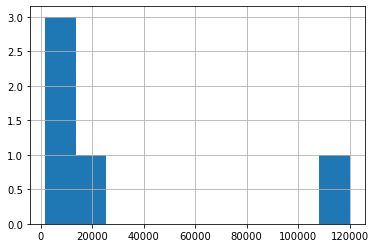

In [17]:
features = df2[['salary','age']]
features['balance'] = [15000, 1800, 120000, 10000,12000]
features.balance.hist()

0     9.615805
1     7.495542
2    11.695247
3     9.210340
4     9.392662
Name: balance, dtype: float64


<AxesSubplot:>

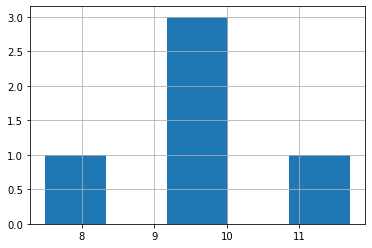

In [18]:
import numpy as np
features['balance'] = np.log(features['balance'])
print(features.balance)
features.balance.hist(bins=5)



Above Plot Shows How Using Log Transformer Distribution is changed to normal distribution.

## 7️⃣ Power Transformer Scaler

* It also changes the distribution of the variable into more Gaussian(normal) distribution.

**Types**
* Box-Cox Transformation
* [The Yeo-Johnson transform](https://www.stat.umn.edu/arc/yjpower.pdf)



### Box-Cox Transformation [Link To Original Article](https://www.statisticshowto.com/box-cox-transformation/)

**Key Notes:**
* A Box-Cox transformation is a transformation of a non-normal dependent varialbes into a normal shape.
* core of box cox transformation is an exponent, lambda(λ) which varies from -5 to 5.

* **For Positive Values**
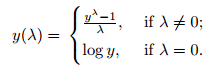
* **For Negative Values**
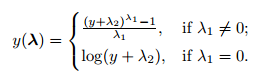


In [19]:
features = df2[['age','salary']]

In [20]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'box-cox')

'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''
col = ['age','salary']

features[col] = scaler.fit_transform(features.values)
features

,age,salary
0,0.199242,0.424734
1,0.477312,0.708820
2,-0.722963,-0.673373
3,-1.427437,-1.600831
4,1.473846,1.140651


## 8️⃣ Unit Vector Scaler/Normalizer

* It Work Upon Each row of the dataframe.

* if we are using **L1** norm, then values in each column are converted so that the sum of their absolute values along the row = 1
* if we are using **L2** norem, then values in each column are first squared and added so that the sum of their absolute values along the row =1


In [21]:
col = ['age','salary']
features = df2[col]

In [22]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm='l2')

# norm = 'l2' is default value

features[col] = scaler.fit_transform(features.values)
features



,age,salary
0,0.001278,0.999999
1,0.001200,0.999999
2,0.002000,0.999998
3,0.006923,0.999976
4,0.001217,0.999999


Now, If We Check the first row sum then it will be approx 1.

0.001278+0.999999 = 1.001277

In [23]:
features['sum']=abs(features['age'])+abs(features['salary'])
features

,age,salary,sum
0,0.001278,0.999999,1.001277
1,0.001200,0.999999,1.001199
2,0.002000,0.999998,1.001998
3,0.006923,0.999976,1.006899
4,0.001217,0.999999,1.001217


## 9️⃣ Custom Transformer

* Consider this situation – Suppose you have your own Python function to transform the data. Sklearn also provides the ability to apply this transform to our dataset using what is called a FunctionTransformer.

Let's take an easy example where we need to take log to the base 2 of all the values in the column. 

In [24]:
col = ['age','salary']
features = df2[col]

In [25]:
from sklearn.preprocessing import FunctionTransformer
transformer  = FunctionTransformer(np.log2,validate=True)

features[col] = transformer.fit_transform(features.values)
features

,age,salary
0,4.523562,14.135709
1,4.584963,14.287712
2,4.321928,13.287712
3,4.169925,11.344296
4,4.807355,14.489346
